# Classification

## Overview
In classification problems, the output space consists of a set of $C$ labels, which are referred to as `classes`. These labels form a set denoted as $\mathcal{Y} = \{1, 2, \ldots, C\}$. The goal in such problem is to predict the correct label for a given input, a task widely known as `pattern recognition`. 

In cases where there are only two possible classes, the labels are typically represented as $y \in \{0, 1\}$ or  $y \in \{-1, +1\}$. This specific type of classification is called binary classification.


## Iris Flowers

As an example of a classification task, consider classifying Iris flowers into one of three subspecies: Setosa, Versicolor, and Virginica. The image below illustrates an example from each class.

```{image} ./figures/iris.png
:width: 680
:align: center
```
Three types of Iris flowers: Setosa (left), Versicolor (center), and Virginica (right).
<br>

The features in the Iris dataset are: sepal length, sepal width, petal length, and petal width. These features are used to classify the flowers into one of three subspecies: Setosa, Versicolor, or Virginica.

The following code demonstrates how to load the Iris dataset using the sklearn library:

In [23]:
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()

print(type(iris))  # Print the type of the dataset object
print(iris.feature_names)  # Print the names of the dataset's features
print(iris.target_names)  # Print the names of the target classes

<class 'sklearn.utils._bunch.Bunch'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


The Iris dataset is a collection of 150 labeled examples of Iris flowers, 50 of each type, described by these 4 features.

In [24]:
import pandas as pd
import numpy as np

# Extract feature data (X) and target labels (y) from the Iris dataset
# Features: Sepal length, sepal width, petal length, petal width
X = iris.data
# Target labels: Encoded as integers (0 = Setosa, 1 = Versicolor, 2 = Virginica)
y = iris.target

# Convert the feature data and target labels into a Pandas DataFrame
df = pd.DataFrame(
    data=X, columns=iris.feature_names
)  # Create a DataFrame with feature names as column headers

# Display the first few rows of the DataFrame to verify its structure and content
df.head()  # Returns the first 5 rows, including features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
# Add a new column for human-readable class labels using the target names
# Map the numerical target labels (0, 1, 2) to their corresponding class names (Setosa, Versicolor, Virginica)
df["label"] = pd.Series(iris.target_names[y], dtype="category")

# Display the first few rows of the DataFrame to verify its structure and content
df.head()  # Returns the first 5 rows, including features and their corresponding class labels

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


For tabular data with a small number of features, it is common to make a `pair plot`, in which panel $(i, j)$ shows a scatter plot of variables $i$ and $j$, and the diagonal entries $(i,i)$ show the marginal density of variable $i$.

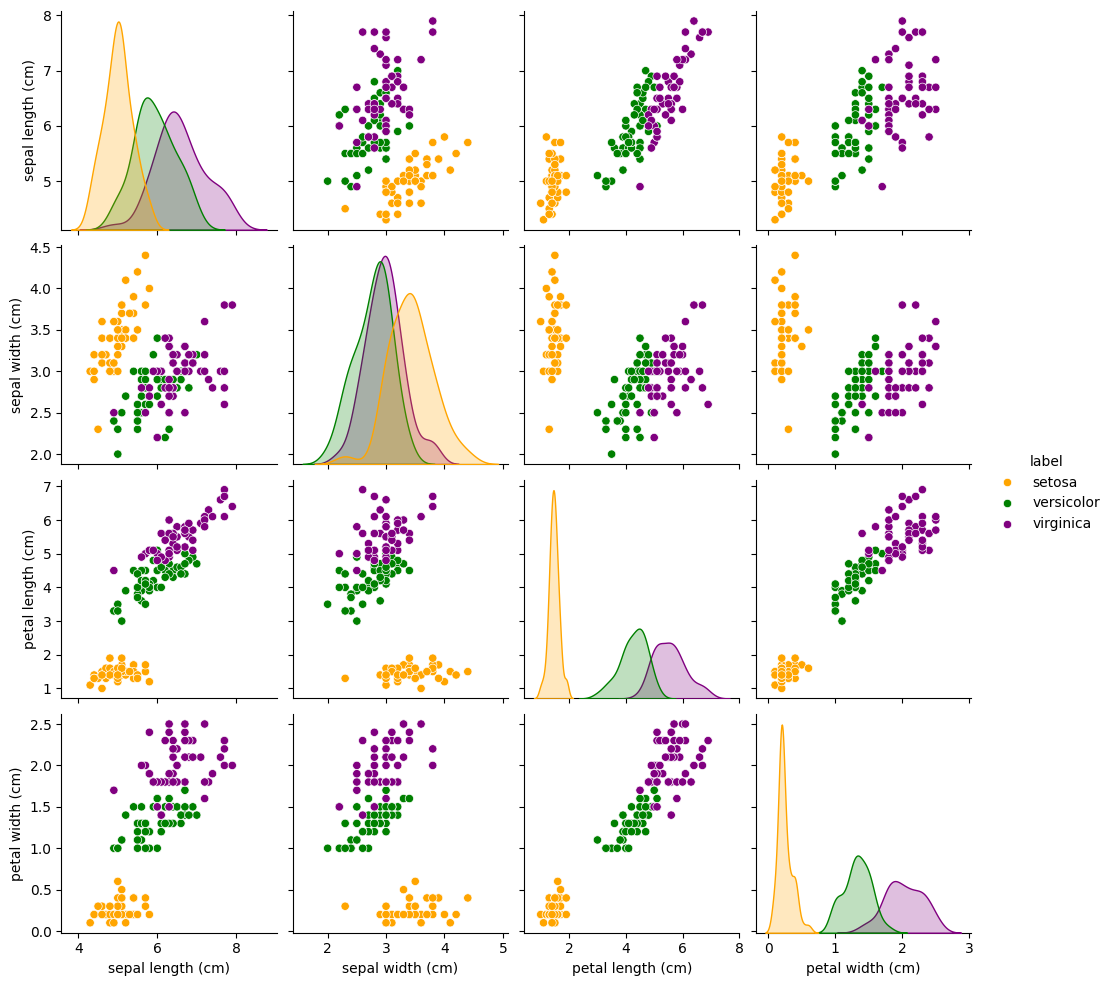

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette to match the colors used in decision tree visualizations
# The keys are the class names (labels), and the values are the colors assigned to each class
palette = {
    "setosa": "orange",  # Setosa class will be represented in orange
    "versicolor": "green",  # Versicolor class will be represented in green
    "virginica": "purple",  # Virginica class will be represented in purple
}

# Create a pair plot using Seaborn to visualize pairwise relationships between features
# - `df`: The DataFrame containing the Iris dataset
# - `vars`: Specifies the columns to use for the pair plot; in this case, the first 4 feature columns
# - `hue`: Groups data points by the "label" column, which corresponds to the class labels
# - `palette`: Applies the custom color mapping defined above for the classes
g = sns.pairplot(df, vars=df.columns[0:4], hue="label", palette=palette)

# Display the resulting plot
plt.show()

The figure above demonstrates that Iris setosa is easily distinguishable due to its unique feature patterns. However, classifying Iris versicolor and Iris virginica is more difficult because their feature spaces overlap.

## Standardization

`Standardization` is a preprocessing technique that rescales the features so that they have the properties of a `standard normal distribution with a mean of 0 and a standard deviation of 1`. This is important in machine learning because it ensures that the features are on a similar scale, preventing some features from dominating the learning process simply because they have larger magnitudes.

The `StandardScaler` in scikit-learn works by calculating the mean and standard deviation of each feature in the training set and then transforming the data based on these statistics. The formula for standardization is:

$$ Standardized Value = \frac{Original Value − Mean}{ Standard Deviation}$$

The purpose of standardization is to make the features of the dataset comparable and to ensure that they all contribute equally to the model training. It is particularly important when working with algorithms that are sensitive to the scale of the input features, such as gradient-based optimization algorithms used in neural networks.

In [27]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to pandas dataframe
df_scaled = pd.DataFrame(data=X_scaled, columns=iris.feature_names)
df_scaled["label"] = pd.Series(iris.target_names[y], dtype="category")
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


## Splitting Dataset
To evaluate a classification model effectively, we divide the dataset into two subsets:

- **Training Set**: Used to train the model.
- **Testing (or Validation) Set**: Used to evaluate the model's performance on unseen data.

This ensures that the model's performance is measured accurately and prevents overfitting. We’ll use the `train_test_split` function from `scikit-learn` to achieve this.

In [28]:
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.naive_bayes import GaussianNB  # A classification algorithm (Naive Bayes)
from sklearn.metrics import accuracy_score  # To measure the model's performance

# Split the data into training and testing sets
# - X: Feature matrix (sepal/petal dimensions for each Iris sample)
# - y: Target labels (numerical representation of Iris species)
# - test_size=0.2: 20% of the data is reserved for testing, and 80% for training
# - random_state=42: Ensures reproducibility by using a fixed seed for randomness
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# The train_test_split function performs:
# - Random shuffling of the dataset.
# - Division of data into two parts: training set (X_train, y_train) and testing set (X_test, y_test).
# - A specified proportion for the split (e.g., 80% training, 20% testing).

# Print the shapes of the resulting datasets for verification
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 120 samples
Testing set size: 30 samples


## Naive Bayes Classifier

The Naive Bayes method is a probabilistic classifier based on Bayes' Theorem. It assumes that features are independent given the class label. Since the Iris dataset consists of continuous, real-valued features, we use the `Gaussian` Naive Bayes classifier, which assumes the feature values are normally distributed.


In [29]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes classifier
from sklearn.metrics import accuracy_score  # To evaluate model accuracy

# Train a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()  # Initialize the Gaussian Naive Bayes classifier

# Fit the classifier to the training data
# - X_train: Feature matrix for training
# - y_train: Target labels for training
nb_classifier.fit(X_train, y_train)

# Evaluate the model on the testing set
# - X_test: Feature matrix for testing
# - y_test: Target labels for testing
y_pred = nb_classifier.predict(X_test)  # Predict the class labels for the test set

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)  # Proportion of correct predictions
print(f"Accuracy: {accuracy * 100:.2f}%")  # Print accuracy as a percentage

Accuracy: 100.00%


We’ll train the Gaussian Naive Bayes classifier on the Iris dataset, evaluate its performance using the training and testing sets, and then use 5-fold cross-validation to assess the model's accuracy across different splits of the dataset.

In [30]:
# Create a Naive Bayes classifier (Gaussian Naive Bayes for this example)
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation to evaluate the model's performance
# - `cv=5`: Specifies 5-fold cross-validation
cv_scores = cross_val_score(nb_classifier, X_scaled, y, cv=5)

# Print cross-validation scores for each fold
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy from cross-validation
mean_accuracy = np.mean(cv_scores)  # Average accuracy across all folds
print("Mean accuracy:", mean_accuracy)

Cross-validation scores: [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Mean accuracy: 0.9533333333333334


## Support Vector Machine (SVM) Classifier

Support Vector Machines (SVMs) are powerful classification models that find the optimal **hyperplane** to separate data points in a feature space. SVMs are particularly effective for binary classification, but they can also handle multi-class problems (like the Iris dataset) using extensions like one-vs-one or one-vs-rest strategies.Let's try the Naive Bayes method to classify the Iris flowers. 

### Understanding Kernels in SVMs
Kernels are mathematical functions that transform data into a higher-dimensional space where a linear hyperplane can separate classes. The choice of kernel plays a critical role in the SVM's ability to handle different types of data:

- Linear Kernel: Suitable for linearly separable data. It finds a straight hyperplane to separate the classes.
- Polynomial Kernel: Useful when the data requires a polynomial decision boundary.
- Radial Basis Function (RBF) Kernel (default): Often a good choice for non-linear data as it maps data to an infinite-dimensional space.
- Sigmoid Kernel: Can handle sigmoid-like data distributions but is less commonly used.

The choice of kernel depends on the nature of the data and the problem we are trying to solve. It's often a good idea to experiment with different kernels to find the one that works best for your specific dataset.

For this example, we use the linear kernel, as it is computationally efficient and works well with the Iris dataset.

In [31]:
from sklearn.svm import SVC  # Support Vector Classifier (SVM implementation)
from sklearn.metrics import accuracy_score  # For evaluating the model's accuracy

# Initialize the SVM classifier
# - `kernel="linear"`: Specifies that we are using a linear kernel for this example
svm_classifier_linear = SVC(kernel="linear")

# Train the SVM model on the training data
# - `X_train`: Feature matrix for training
# - `y_train`: Target labels for training
svm_classifier_linear.fit(X_train, y_train)

# Evaluate the trained model on the testing set
# - `X_test`: Feature matrix for testing
# - `y_test`: True target labels for testing
y_pred = svm_classifier_linear.predict(X_test)  # Predict class labels for the test set

# Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)  # Proportion of correct predictions
print(f"Accuracy: {accuracy * 100:.2f}%")  # Print accuracy as a percentage

Accuracy: 96.67%


### Using 5-Fold Cross-Validation

We will use 5-fold cross-validation to evaluate the accuracy of our SVM classifier. This approach divides our dataset into five subsets, trains the model on four subsets, and tests it on the remaining subset, repeating this process five times. This method helps us get a reliable estimate of the model's performance.

In [32]:
from sklearn.model_selection import KFold, cross_val_score

# Define the cross-validation method. We are using 5-fold cross-validation.
# - `n_splits=5` specifies the number of folds.
# - `shuffle=True` ensures that the data is shuffled before splitting into folds, which helps in achieving better generalization.
# - `random_state=42` sets a fixed random seed for reproducibility, so that we get the same data splits every time we run the code.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold cross-validation
# - `svm_classifier` is our model (assumed to be predefined).
# - `X` is the feature matrix (assumed to be predefined).
# - `y` is the target vector (assumed to be predefined).
# - `cv=kf` uses the KFold object we defined as the cross-validation strategy.
cv_scores = cross_val_score(svm_classifier_linear, X_scaled, y, cv=kf)

# Step 4: Print the cross-validation scores for each fold
print("Cross-validation scores:", cv_scores)

# Step 4: Calculate and print the mean accuracy
# - We use `np.mean` to compute the average of the cross-validation scores.
mean_accuracy = np.mean(cv_scores)
print("Mean accuracy:", mean_accuracy)

Cross-validation scores: [0.96666667 0.96666667 0.96666667 0.96666667 1.        ]
Mean accuracy: 0.9733333333333334


We want to evaluate the performance of the default kernel, Radial Basis Function (RBF), for a Support Vector Classifier (SVC) using 5-fold cross-validation on the Iris dataset and compare it with the linear kernel.

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold

# Define the cross-validation method using 5-fold cross-validation
# - We reuse `kf` from the previous code block for consistency.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create an instance of the classifier
# - `SVC()` creates a Support Vector Classifier with the default RBF kernel.
svm_classifier_rbf = SVC()

# Perform cross-validation and calculate the scores
# - `classifier` is the model we want to evaluate.
# - `X` is the feature matrix (assumed to be predefined).
# - `y` is the target vector (assumed to be predefined).
# - `cv=kf` uses the KFold object we defined as the cross-validation strategy.
# - `scoring="accuracy"` specifies that we want to evaluate the model based on accuracy.
scores = cross_val_score(svm_classifier_rbf, X_scaled, y, cv=kf, scoring="accuracy")

# Print the cross-validation scores for each fold
print("Cross-validation scores:", scores)

# Calculate and print the mean accuracy
# - We use `np.mean` to compute the average of the cross-validation scores.
mean_accuracy = np.mean(scores)
print("Mean accuracy:", mean_accuracy)

Cross-validation scores: [1.         0.96666667 0.96666667 0.93333333 0.96666667]
Mean accuracy: 0.9666666666666668


For this Iris dataset, the linear kernel works better than the RBF kernel.

## Neural Networks

`MLPClassifier` stands for Multi-Layer Perceptron Classifier. It is a type of artificial neural network-based classification algorithm. The term "multi-layer perceptron" refers to the architecture of the network, which consists of multiple layers of nodes (neurons) organized in a feedforward manner.

The MLPClassifier in scikit-learn has several important parameters that allow you to customize the architecture and behavior of the neural network. Here are some key parameters:

- hidden_layer_sizes (default=(100,)): This parameter defines the architecture of the neural network. It is a tuple where each element represents the number of neurons in the corresponding hidden layer. For example, hidden_layer_sizes=(10, 5) defines a network with two hidden layers, the first with 10 neurons and the second with 5.

- activation (default='relu'): Activation function for the hidden layers. Common choices include 'relu' (Rectified Linear Unit), 'logistic' (sigmoid), and 'tanh' (hyperbolic tangent).

- solver (default='adam'): Optimization algorithm to use. Common choices include 'sgd' (stochastic gradient descent), 'adam' (a popular variant of gradient descent), and 'lbfgs' (a quasi-Newton method).

- learning_rate_init (default=0.001): The initial learning rate. It controls the step size in updating the weights.

- max_iter (default=200): Maximum number of iterations. The solver iterates until convergence (determined by the tol parameter) or until this number of iterations is reached.

- random_state (default=None): Seed used by the random number generator.

- tol (default=1e-4): Tolerance for the optimization. If the change in the objective function is smaller than this value, the optimization will be considered as converged.

- verbose: If set to True, it prints progress messages to the console during training.

These are just some of the key parameters. Depending on your specific use case, you may also want to explore other parameters provided by the MLPClassifier class. It's often beneficial to experiment with different parameter values and architectures to find the combination that works best for your particular dataset and problem.

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a neural network classifier using scikit-learn's MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(10,),
    max_iter=1000,
    random_state=42,
    solver="sgd",
    verbose=1,
    tol=1e-4,
    learning_rate_init=0.1,
)

# Fit the model to the training data
mlp.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = mlp.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy * 100:.2f}")


# Evaluate the performance
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Iteration 1, loss = 1.36714411
Iteration 2, loss = 1.18921901
Iteration 3, loss = 1.00875630
Iteration 4, loss = 0.85367491
Iteration 5, loss = 0.72641469
Iteration 6, loss = 0.62117297
Iteration 7, loss = 0.53514402
Iteration 8, loss = 0.46618582
Iteration 9, loss = 0.41118992
Iteration 10, loss = 0.36897772
Iteration 11, loss = 0.33749092
Iteration 12, loss = 0.31376203
Iteration 13, loss = 0.29489437
Iteration 14, loss = 0.27855658
Iteration 15, loss = 0.26350557
Iteration 16, loss = 0.24911145
Iteration 17, loss = 0.23527230
Iteration 18, loss = 0.22198951
Iteration 19, loss = 0.20918275
Iteration 20, loss = 0.19679826
Iteration 21, loss = 0.18482787
Iteration 22, loss = 0.17333673
Iteration 23, loss = 0.16244474
Iteration 24, loss = 0.15226559
Iteration 25, loss = 0.14287097
Iteration 26, loss = 0.13429254
Iteration 27, loss = 0.12654158
Iteration 28, loss = 0.11960936
Iteration 29, loss = 0.11344815
Iteration 30, loss = 0.10800310
Iteration 31, loss = 0.10322739
Iteration 32, los

## Pipeline

In scikit-learn, a Pipeline is a way to streamline a lot of the routine processes, especially in the context of `feature preprocessing and model building`. It sequentially applies a list of transforms and a final estimator. Intermediate steps of the pipeline must be transformers (i.e., they must implement the fit and transform methods), while the final estimator only needs to implement the fit method.

The main purpose of a Pipeline is to assemble several steps that can be cross-validated together while setting different parameters. This ensures that each step in the process is applied in the correct order.

Here's a simple example using a pipeline with StandardScaler and MLPClassifier:

In [35]:
from sklearn.pipeline import make_pipeline

# Create a pipeline with StandardScaler and MLPClassifier
pipeline = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42),
)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict using the pipeline
y_pred = pipeline.predict(X_test)

print(y_pred)
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


We want to use 5-fold cross-validation to find accuracy scores and their average.

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Create an MLPClassifier and a pipeline with StandardScaler
pipeline = make_pipeline(StandardScaler(), mlp)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5)

# Display the cross-validation scores
print("Cross-validation scores:", cv_scores)
print(f"Mean accuracy: {cv_scores.mean():.2f}")

Iteration 1, loss = 1.36430638
Iteration 2, loss = 1.18638437
Iteration 3, loss = 1.00430655
Iteration 4, loss = 0.84704254
Iteration 5, loss = 0.71719051
Iteration 6, loss = 0.61047342
Iteration 7, loss = 0.52313618
Iteration 8, loss = 0.45239689
Iteration 9, loss = 0.39527744
Iteration 10, loss = 0.35048384
Iteration 11, loss = 0.31668698
Iteration 12, loss = 0.29166899
Iteration 13, loss = 0.27259234
Iteration 14, loss = 0.25686986
Iteration 15, loss = 0.24287902
Iteration 16, loss = 0.23014230
Iteration 17, loss = 0.21853451
Iteration 18, loss = 0.20789177
Iteration 19, loss = 0.19811174
Iteration 20, loss = 0.18896397
Iteration 21, loss = 0.18024311
Iteration 22, loss = 0.17184486
Iteration 23, loss = 0.16375180
Iteration 24, loss = 0.15599896
Iteration 25, loss = 0.14862289
Iteration 26, loss = 0.14166167
Iteration 27, loss = 0.13511271
Iteration 28, loss = 0.12897770
Iteration 29, loss = 0.12326143
Iteration 30, loss = 0.11797185
Iteration 31, loss = 0.11312110
Iteration 32, los